## Accessing data

In [20]:
from sentinelsat import SentinelAPI

user = 'Enter Username' 
password = 'Enter Password' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')
api

In [21]:
import geopandas as gpd
import folium 

In [22]:


nReserve = gpd.read_file('C:/Users/Jean Paul/Downloads/map (11).geojson')

m = folium.Map([-13.2512161, 34.3015278], zoom_start=12)
folium.GeoJson(nReserve).add_to(m)
m

In [23]:
from shapely.geometry import MultiPolygon, Polygon

footprint = None
for i in nReserve['geometry']:
    footprint = i

In [24]:
products = api.query(footprint,
                     date = ('20181015', '20200130'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,50)
                    )

Querying products:  33%|###3      | 100/301 [00:00<?, ?product/s]

In [25]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
b1078375-443a-4caf-b767-6fcf0b6d1c1c,S2B_MSIL2A_20190901T073619_N0213_R092_T36LWL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-01T07:36:19.024Z, Instrument: MS...",false,2019-09-01 07:36:19.024,2019-09-01 07:36:19.024,2019-09-01 16:17:28.950,12988,...,02.13,Level-2A,S2MSI2A,Sentinel-2,942.57 MB,S2B_MSIL2A_20190901T073619_N0213_R092_T36LWL_2...,S2B_OPER_MSI_L1C_TL_SGS__20190901T112323_A0129...,S2B_MSIL2A_20190901T073619_N0213_R092_T36LWL_2...,b1078375-443a-4caf-b767-6fcf0b6d1c1c,"MULTIPOLYGON (((33.08703 -13.65671, 34.01502 -..."
d0cf5e83-351a-4bae-8999-d87c4d32041e,S2B_MSIL2A_20190805T074619_N0213_R135_T36LWK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-08-05T07:46:19.024Z, Instrument: MS...",false,2019-08-05 07:46:19.024,2019-08-05 07:46:19.024,2019-08-05 18:40:17.647,12602,...,02.13,Level-2A,S2MSI2A,Sentinel-2,325.77 MB,S2B_MSIL2A_20190805T074619_N0213_R135_T36LWK_2...,S2B_OPER_MSI_L1C_TL_MTI__20190805T100613_A0126...,S2B_MSIL2A_20190805T074619_N0213_R135_T36LWK_2...,d0cf5e83-351a-4bae-8999-d87c4d32041e,"MULTIPOLYGON (((32.99981 -14.56126, 33.15151 -..."
0b61314f-900c-4b9d-a796-8b1b6c47e056,S2A_MSIL2A_20190929T074711_N0213_R135_T36LWK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-29T07:47:11.024Z, Instrument: MS...",false,2019-09-29 07:47:11.024,2019-09-29 07:47:11.024,2019-09-29 17:25:56.334,22297,...,02.13,Level-2A,S2MSI2A,Sentinel-2,312.03 MB,S2A_MSIL2A_20190929T074711_N0213_R135_T36LWK_2...,S2A_OPER_MSI_L1C_TL_MTI__20190929T100745_A0222...,S2A_MSIL2A_20190929T074711_N0213_R135_T36LWK_2...,0b61314f-900c-4b9d-a796-8b1b6c47e056,"MULTIPOLYGON (((32.99981 -14.56126, 33.14963 -..."
77f7b8bf-af7e-4bd5-8e1b-401cae6ad7a7,S2A_MSIL2A_20190830T074611_N0213_R135_T36LWK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-08-30T07:46:11.024Z, Instrument: MS...",false,2019-08-30 07:46:11.024,2019-08-30 07:46:11.024,2019-08-30 18:05:50.374,21868,...,02.13,Level-2A,S2MSI2A,Sentinel-2,321.32 MB,S2A_MSIL2A_20190830T074611_N0213_R135_T36LWK_2...,S2A_OPER_MSI_L1C_TL_MTI__20190830T100724_A0218...,S2A_MSIL2A_20190830T074611_N0213_R135_T36LWK_2...,77f7b8bf-af7e-4bd5-8e1b-401cae6ad7a7,"MULTIPOLYGON (((32.99981 -14.56126, 33.15376 -..."
d1ce7239-049d-450f-99c9-4770004b04dc,S2B_MSIL2A_20190901T073619_N0213_R092_T36LXK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-01T07:36:19.024Z, Instrument: MS...",false,2019-09-01 07:36:19.024,2019-09-01 07:36:19.024,2019-09-01 16:23:25.258,12988,...,02.13,Level-2A,S2MSI2A,Sentinel-2,1.03 GB,S2B_MSIL2A_20190901T073619_N0213_R092_T36LXK_2...,S2B_OPER_MSI_L1C_TL_SGS__20190901T112323_A0129...,S2B_MSIL2A_20190901T073619_N0213_R092_T36LXK_2...,d1ce7239-049d-450f-99c9-4770004b04dc,"MULTIPOLYGON (((33.92826 -14.55942, 34.94718 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921714f3-04dc-4657-954e-f5041fadec11,S2A_MSIL2A_20190608T073611_N0212_R092_T36LXK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-08T07:36:11.024Z, Instrument: MS...",false,2019-06-08 07:36:11.024,2019-06-08 07:36:11.024,2019-06-08 19:47:00.071,20681,...,02.12

In [26]:
print(len(products))

301


<AxesSubplot:>

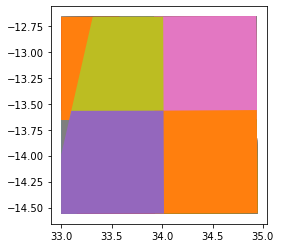

In [27]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

In [28]:
areas.uuid

844c30cd-bb6e-40cd-a8a3-21b19cc131a4    844c30cd-bb6e-40cd-a8a3-21b19cc131a4
5430f190-e45a-45b6-b6e6-f53e68fda3b7    5430f190-e45a-45b6-b6e6-f53e68fda3b7
69e364aa-196c-49ea-a1d6-b4f83fd8178b    69e364aa-196c-49ea-a1d6-b4f83fd8178b
8b16f45c-f9ee-4a35-b52b-ea9094dcc51f    8b16f45c-f9ee-4a35-b52b-ea9094dcc51f
440b4d20-4313-44bc-90d5-ef263a4269b1    440b4d20-4313-44bc-90d5-ef263a4269b1
                                                        ...                 
27fa3062-0139-4b51-8292-5ffac238f10a    27fa3062-0139-4b51-8292-5ffac238f10a
99c8c374-6ac4-4524-9777-d43ff93e9af1    99c8c374-6ac4-4524-9777-d43ff93e9af1
db230eed-c574-4bc4-9d53-5b9b4a43c6b6    db230eed-c574-4bc4-9d53-5b9b4a43c6b6
16ac5e32-8cf1-4b60-859e-dab54d945121    16ac5e32-8cf1-4b60-859e-dab54d945121
6b3f0b6c-3f50-47e4-8a14-c856fe6698d9    6b3f0b6c-3f50-47e4-8a14-c856fe6698d9
Name: uuid, Length: 301, dtype: object

In [29]:
#check online api's
def checkProductID():
    for i in range(len(products_gdf['uuid'])):
        product_id = api.get_product_odata(products_gdf['uuid'][i])
        for j in product_id.keys():
            if j == 'Online':
                print(f"For the index = {i} , the product {products_gdf['uuid'][i]}"
                      f" is online True or False? :  {product_id[j]}")


In [30]:
checkProductID()

For the index = 0 , the product 844c30cd-bb6e-40cd-a8a3-21b19cc131a4 is online True or False? :  False
For the index = 1 , the product 5430f190-e45a-45b6-b6e6-f53e68fda3b7 is online True or False? :  False
For the index = 2 , the product 69e364aa-196c-49ea-a1d6-b4f83fd8178b is online True or False? :  False
For the index = 3 , the product 8b16f45c-f9ee-4a35-b52b-ea9094dcc51f is online True or False? :  False
For the index = 4 , the product 440b4d20-4313-44bc-90d5-ef263a4269b1 is online True or False? :  False
For the index = 5 , the product abdd9d75-c152-4990-aa62-e94a291e8356 is online True or False? :  False
For the index = 6 , the product 95d5e9ac-a32d-4a72-af96-766216f908dd is online True or False? :  False
For the index = 7 , the product b5cded22-fd46-4129-913d-ace37078a0e1 is online True or False? :  False
For the index = 8 , the product 8792252f-36cb-4a1d-a0ce-dbe289f95671 is online True or False? :  False
For the index = 9 , the product 64914b66-978a-4cfb-9c56-aa18396f74d6 is o

For the index = 79 , the product 0d497f50-b8a9-4e87-acac-36dac3019fdc is online True or False? :  False
For the index = 80 , the product 66bc3b21-3a20-4e5f-9074-5f85d0daaadf is online True or False? :  False
For the index = 81 , the product db2fa359-7fe5-453c-84ac-4b0e4b1d3ba5 is online True or False? :  False
For the index = 82 , the product 0069efad-7266-45a5-a6e3-0e339be05436 is online True or False? :  False
For the index = 83 , the product 7c88accc-d88b-4b26-aa34-8f45186c0b1f is online True or False? :  False
For the index = 84 , the product d742969d-79db-4796-8928-a33c1f427941 is online True or False? :  False
For the index = 85 , the product e3d76093-99e6-424d-8573-880ade20e9a3 is online True or False? :  False
For the index = 86 , the product 0345b252-e000-48f2-897a-132725998ea4 is online True or False? :  False
For the index = 87 , the product 2b0c958a-d183-4baa-a47e-9f84246e3eea is online True or False? :  False
For the index = 88 , the product 2a8d0726-81f4-4bcf-8ed0-124f05d

For the index = 158 , the product ec9aa3ce-62a3-4007-8a66-7b93b507c4e8 is online True or False? :  False
For the index = 159 , the product 62af55e7-5e55-4b64-9d77-e63786b1495f is online True or False? :  False
For the index = 160 , the product 15d7434e-fe8c-4bc6-9255-378b1bccc02d is online True or False? :  False
For the index = 161 , the product 011d33ec-db11-4568-bc56-2f2515ab3b12 is online True or False? :  False
For the index = 162 , the product ba2ac789-133b-4d41-b019-d75a9c58c423 is online True or False? :  False
For the index = 163 , the product 4d18481b-4a82-4589-91df-9e6549a50caa is online True or False? :  False
For the index = 164 , the product 2b1b5a5a-615d-4911-8196-4bdc23071ba1 is online True or False? :  False
For the index = 165 , the product b94d88de-a0cc-4a24-bc9f-07896cf5f6ee is online True or False? :  False
For the index = 166 , the product 31fc7b17-8dc0-40ef-8604-8057ceed7aa2 is online True or False? :  False
For the index = 167 , the product 66ff9bba-0f13-4ee1-9d

For the index = 237 , the product 2a3b6b8b-543e-4d25-83bb-c00730e53147 is online True or False? :  False
For the index = 238 , the product cbd8538a-2dac-4590-9cc5-fabda97f1bbd is online True or False? :  False
For the index = 239 , the product 065f1b00-cb7b-4470-9825-a1803763c0b1 is online True or False? :  False
For the index = 240 , the product 06acf15c-bfcd-4b2c-86ea-6cb5a8aca622 is online True or False? :  False
For the index = 241 , the product 75b0b68a-f279-4428-9c2e-6ce5eb91bcd7 is online True or False? :  False
For the index = 242 , the product 0c6d5bfd-a478-4db7-8f15-f5a4a1b9960d is online True or False? :  False
For the index = 243 , the product e57bc0eb-bd83-4dd9-aa4f-2c70d8cca3f9 is online True or False? :  False
For the index = 244 , the product 505bea15-97ca-4319-beff-9042e0f6fcab is online True or False? :  False
For the index = 245 , the product df3626f3-eace-4557-8044-b9051285a837 is online True or False? :  False
For the index = 246 , the product 80953c33-9389-4611-ac

In [31]:
#api.download('506a3b42-a067-4c71-bdc6-1c6ad477053c')


In [28]:
api.get_product_odata('6786a928-7dac-4530-8eed-7fce557f61a9')

{'id': '6786a928-7dac-4530-8eed-7fce557f61a9',
 'title': 'S2A_MSIL2A_20210521T074611_N0300_R135_T36LWL_20210521T102612',
 'size': 569467188,
 'md5': '642e41bb8bbbaab8222804d923c07b68',
 'date': datetime.datetime(2021, 5, 21, 7, 46, 11, 24000),
 'footprint': 'POLYGON((33.57498557185191 -12.662914896618169,33.56825666714394 -12.693097903842771,33.53568582593971 -12.841532321632696,33.502784593098355 -12.989955312609233,33.46974585133852 -13.138358952935706,33.43694387329254 -13.28688665804855,33.404095466710814 -13.43546522903187,33.371324930803524 -13.584106791318453,33.355332061736696 -13.656157842047904,32.99981507007838 -13.656884794024252,32.99981581315346 -12.664007022186597,33.57498557185191 -12.662914896618169))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('6786a928-7dac-4530-8eed-7fce557f61a9')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 5, 21, 14, 7, 10, 753000),
 'Ingestion Date': datetime.datetime(2021, 5, 21, 14, 6, 52, 225000),
 'qu

# Exploring Satellite Imagery with Rasterio

In [29]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

# Clip Satellite images

In [30]:
S_sentinel_bands = glob("C:/Users/Jean Paul/Documents/Malawi/IMG_DATA/R10m/*B?*.jp2")

S_sentinel_bands.sort()

l = []

for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))
    
arr_st = np.stack(l)

In [31]:
S_sentinel_bands

['C:/Users/Jean Paul/Documents/Malawi/IMG_DATA/R10m\\T36LWL_20210521T074611_B02_10m.jp2',
 'C:/Users/Jean Paul/Documents/Malawi/IMG_DATA/R10m\\T36LWL_20210521T074611_B03_10m.jp2',
 'C:/Users/Jean Paul/Documents/Malawi/IMG_DATA/R10m\\T36LWL_20210521T074611_B04_10m.jp2',
 'C:/Users/Jean Paul/Documents/Malawi/IMG_DATA/R10m\\T36LWL_20210521T074611_B08_10m.jp2']

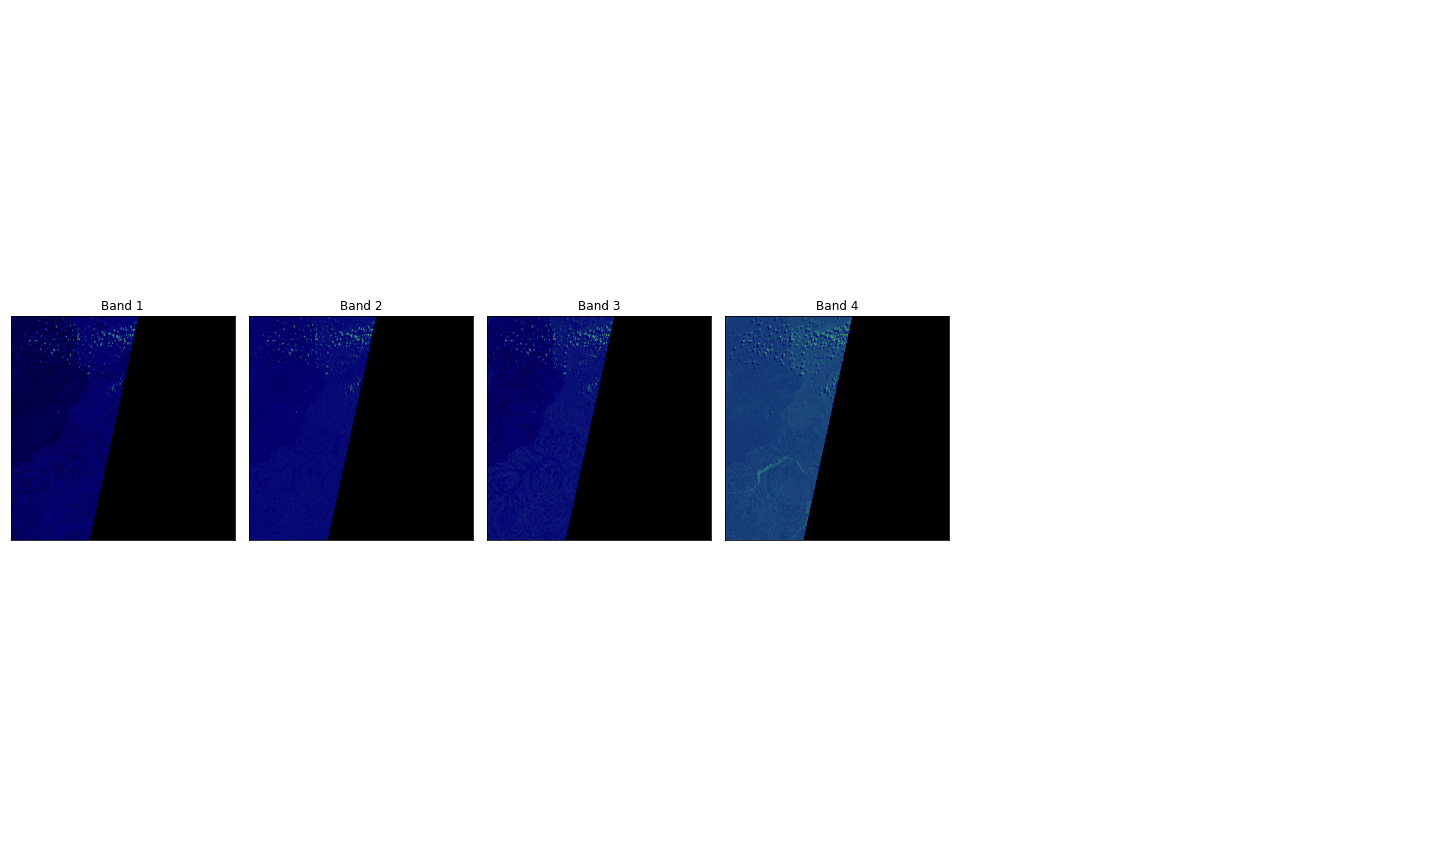

In [32]:
ep.plot_bands(arr_st, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 6, 
              cbar = False)
plt.show()

# Create RGB Image

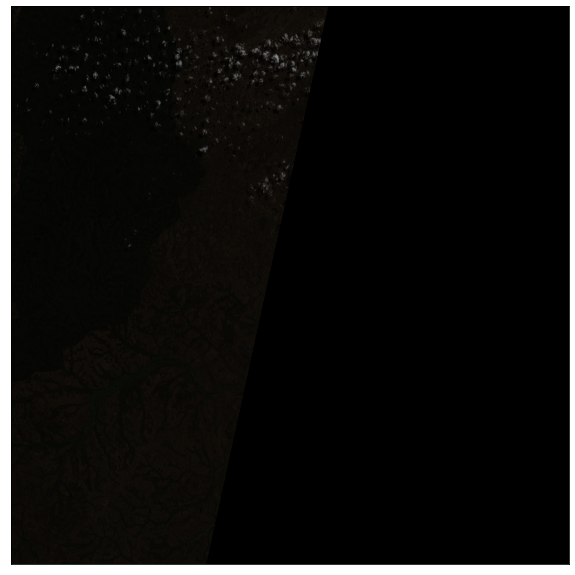

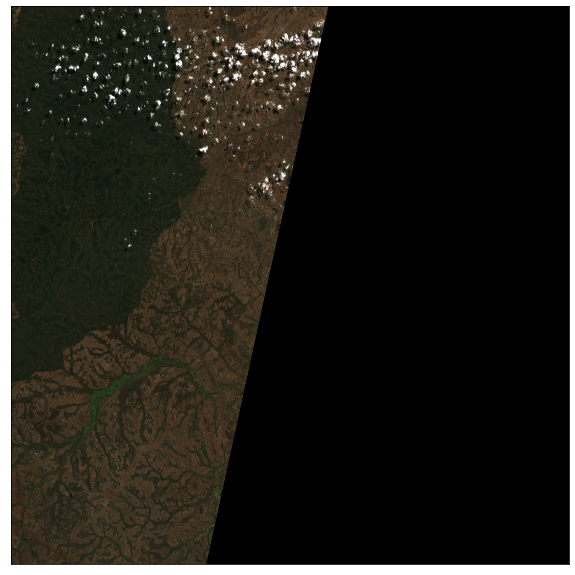

In [33]:
# RGB Composite Image

rgb = ep.plot_rgb(arr_st, 
                  rgb=(2,1,0), 
                  figsize=(10, 16))
plt.show()

# RGB Composite Image with Strech

ep.plot_rgb(arr_st,
            rgb=(2, 1, 0),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
plt.show()

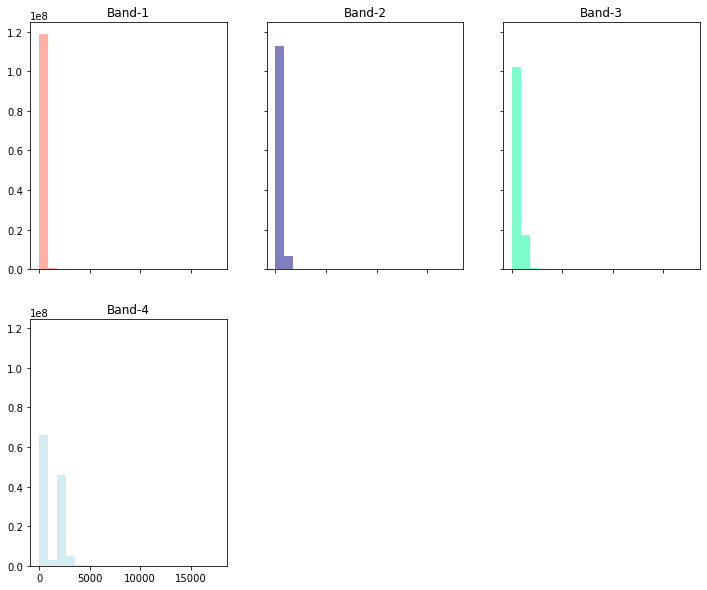

In [34]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 5)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10))

plt.show()

# Create NDVI

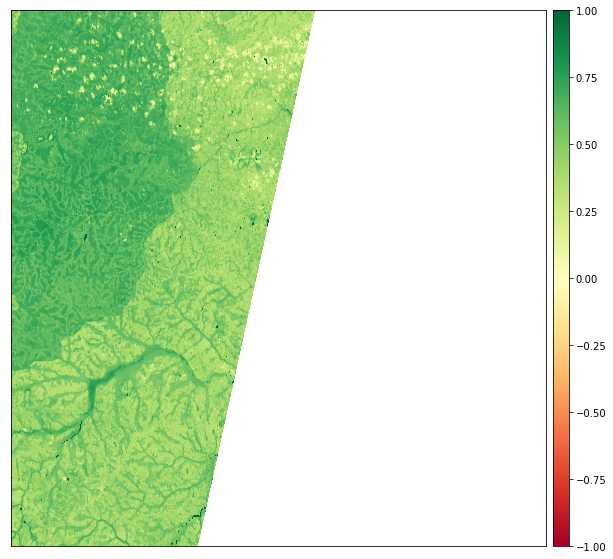

In [35]:
ndvi = es.normalized_diff(arr_st[3 ], arr_st[2])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [36]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

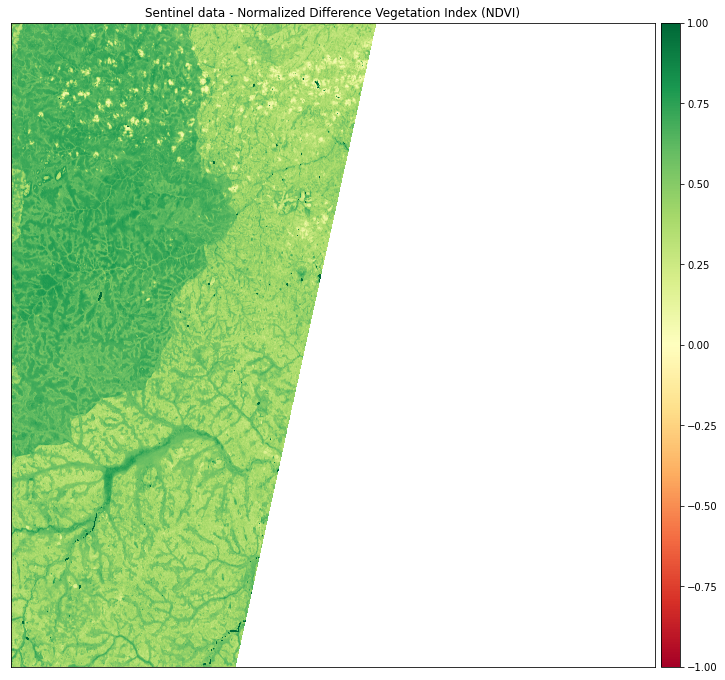

<AxesSubplot:title={'center':'Sentinel data - Normalized Difference Vegetation Index (NDVI)'}>

In [37]:
titles = ["Sentinel data - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

# Classify NDVI


In [38]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[2, 3, 4, 5, --],
             mask=[False, False, False, False,  True],
       fill_value=999999,
            dtype=int64)

In [39]:
ndvi_landsat_class.shape

(10980, 10980)

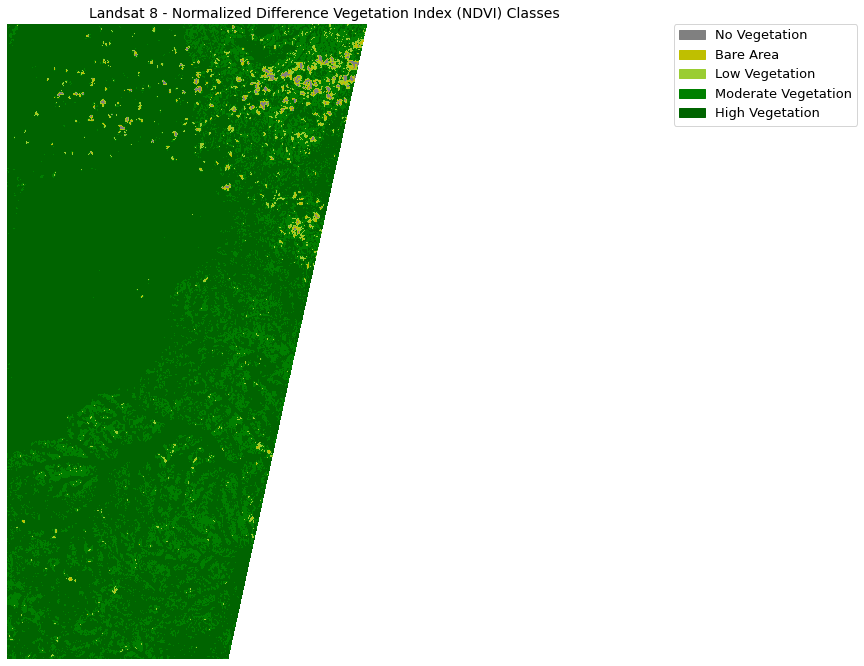

In [40]:
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

# Visible Atmospherically Resistant Index (VARI)

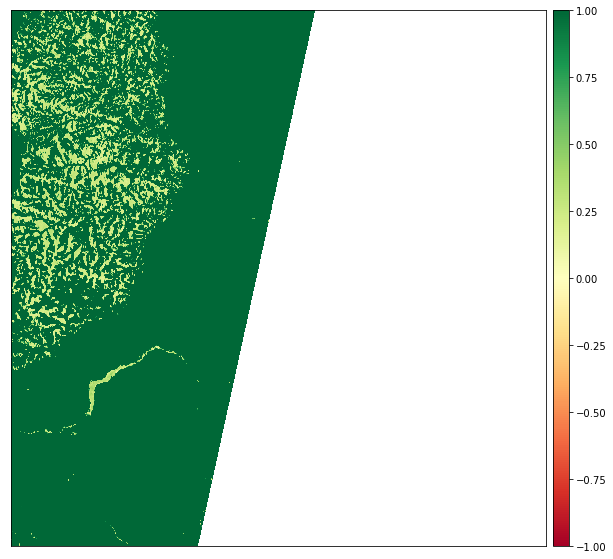

In [41]:
VARI = (arr_st[1 ] - arr_st[2 ])/ (arr_st[1 ] + arr_st[2 ] - arr_st[0 ])
ep.plot_bands(VARI, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()
